# Pré processamento de dados
A base de dados utilizada oferecida pelo [Ministério da Justiça e Segurança Pública](https://www.gov.br/mj/pt-br/assuntos/sua-seguranca/seguranca-publica/estatistica/download/dnsp-base-de-dados) é um grande compilado de dados de todos os municipios de diversas fontes. Por isso, é possível encontrar informações ausentes, municipios não informados, dados com objetivos diferentes, etc...

Por causa disso, será necessário darmos uma filtrada e manipular esses dados para adequar ao uso dos nossos algoritmos.

In [40]:


import pandas as pd

CAMINHO_ARQUIVO = './BancoVDE 2025.xlsx'

In [41]:
df = pd.read_excel(CAMINHO_ARQUIVO)
df.head(5)

,uf,municipio,evento,data_referencia,agente,arma,faixa_etaria,feminino,masculino,nao_informado,total_vitima,total,total_peso,abrangencia,formulario
0,AC,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.813,Estadual,Formulário 5
1,AL,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.380,Estadual,Formulário 5
2,AM,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.023,Estadual,Formulário 5
3,AP,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.570,Estadual,Formulário 5
4,BA,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.877,Estadual,Formulário 5


In [42]:
# Para nossa pesquisa, colunas como abrangencia, formulário, agente e arma não fazem tanto sentido.
# Além disso a coluna total_peso é referente apenas a crime de apreensão de drogas, e não é relevante para nossa análise.
print(df.columns.tolist())

['uf', 'municipio', 'evento', 'data_referencia', 'agente', 'arma', 'faixa_etaria', 'feminino', 'masculino', 'nao_informado', 'total_vitima', 'total', 'total_peso', 'abrangencia', 'formulario']


In [43]:
# Removendo colunas irrelevantes do dataset
colunas_para_remover = ['abrangencia', 'formulario', 'agente', 'arma', 'total_peso']
df = df.drop(columns=colunas_para_remover)
df.head(5)

,uf,municipio,evento,data_referencia,faixa_etaria,feminino,masculino,nao_informado,total_vitima,total
0,AC,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2,AM,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
3,AP,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
4,BA,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# A coluna 'municipio' tem um valor 'NÃO INFORMADO' que não é útil para nossa análise, então vamos removê-lo.
df = df[df['municipio'] != 'NÃO INFORMADO']
df.head(5)

,uf,municipio,evento,data_referencia,faixa_etaria,feminino,masculino,nao_informado,total_vitima,total
5508,AC,ACRELÂNDIA,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5509,AC,ASSIS BRASIL,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5510,AC,BRASILÉIA,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5511,AC,BUJARI,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5512,AC,CAPIXABA,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN


In [45]:
# Após o tratamento dos dados, podemos observar que a faixa etaria só apresenta valores NaN, o que não é útil para nossa análise.
valores_unicos = df['faixa_etaria'].unique()
print("Valores únicos na coluna 'faixa_etaria':", valores_unicos)
df = df.drop(columns=['faixa_etaria'])

Valores únicos na coluna 'faixa_etaria': <StringArray>
[nan]
Length: 1, dtype: str


Agora, com os dados minimamente tratados, iremos tratar algumas inconsistências e remover mais dados irrelevantes.

In [46]:
# Análise da coluna total
df_filtrado = df[df['total'] > 0]
print("Valores únicos na coluna 'evento' após filtragem:", df_filtrado['evento'].unique())
df_filtrado.head(5)

Valores únicos na coluna 'evento' após filtragem: <StringArray>
['Mandado de prisão cumprido']
Length: 1, dtype: str


,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima,total
208476,AC,ACRELÂNDIA,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,4.0
208478,AC,BRASILÉIA,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,2.0
208479,AC,BUJARI,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,1.0
208480,AC,CAPIXABA,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,3.0
208481,AC,CRUZEIRO DO SUL,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,4.0


Nesse caso, iremos assumir que "Mandado de prisão cumprido" não é necessarimente um crime cometido. Provavelmente, o motivo desse dado estar aqui é a forma como o sistema funciona.
Sendo assim, para evitar qualquer influência, ou resultado enviezado, iremos remover essa coluna e todos os crimes dessa categoria.

In [47]:
df = df.drop(columns=['total'])
df = df[~(df['evento'] == 'Mandado de prisão cumprido')]

Além disso, o evento Mortes a esclarecer (sem indício de crime) é declaradamente algo não criminoso. Sendo assim, iremos também remover essa informação

In [48]:
df = df[~(df['evento'] == 'Mortes a esclarecer (sem indício de crime)')]

Outra coisa que é possível perceber é a inconsistência entre a classificação das vitmas. Alguns crimes possuem a separação por gênero e o total de vitmas, outros se concentram apenas no total de vitmas. 

In [49]:
# Situação onde existe uma vítima, mas o gênero não é informado
df_filtrado = df[df['total_vitima'] > 0 & ((df['feminino'] == 0) & (df['masculino'] == 0) & (df['nao_informado'] == 0))]
print("Valores únicos na coluna 'evento' após filtragem por total_vitima > 0:", df_filtrado['evento'].unique())
df_filtrado.head(5)

Valores únicos na coluna 'evento' após filtragem por total_vitima > 0: <StringArray>
[                                                       'Feminicídio',
                                                   'Homicídio doloso',
                                    'Lesão corporal seguida de morte',
 'Morte no trânsito ou em decorrência dele (exceto homicídio doloso)',
                                'Roubo seguido de morte (latrocínio)',
                                                           'Suicídio',
                                           'Tentativa de feminicídio',
                                             'Tentativa de homicídio']
Length: 8, dtype: str


,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima
5517,AC,MÂNCIO LIMA,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5633,AL,VIÇOSA,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5641,AM,BARCELOS,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5751,BA,BARREIRAS,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5778,BA,CAETITÉ,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0


In [50]:
# Garantia que não existem registros onde o total de vítimas é zero, mas existe um gênero informado
df_filtrado = df[((df['feminino'] > 0) | (df['masculino'] > 0) | (df['nao_informado'] > 0)) & (df['total_vitima'] == 0)]
print("Valores únicos na coluna 'evento' após filtragem por gênero:", df_filtrado['evento'].unique())
df_filtrado.head(5)

Valores únicos na coluna 'evento' após filtragem por gênero: <StringArray>
[]
Length: 0, dtype: str


,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima


Para o propósito desse estudo, faz mais sentido apenas olharmos para a quantidade total de vitmas ao invés da caracteristica do dado. Sendo assim, iremos remover essa dimensão da informação.

In [51]:
# Mas antes, vamos garantir que não existe nenhum erro de calculo, onde o total de vítimas é diferente da soma dos gêneros
colunas_soma = ['feminino', 'masculino', 'nao_informado']
df_calc = df[colunas_soma + ['total_vitima']].fillna(0)



soma_partes = df_calc['feminino'] + df_calc['masculino'] + df_calc['nao_informado']

divergencias = df[soma_partes != df_calc['total_vitima']].copy()
divergencias['soma_calculada'] = soma_partes[soma_partes != df_calc['total_vitima']]
divergencias

,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima,soma_calculada


Desse modo, confirmamos que não há divergências. Agora vamos remover as colunas de gênero

In [52]:
colunas_para_remover = ['feminino', 'masculino', 'nao_informado']
df = df.drop(columns=colunas_para_remover)
df.head(5)

,uf,municipio,evento,data_referencia,total_vitima
5508,AC,ACRELÂNDIA,Feminicídio,2025-01-01,0.0
5509,AC,ASSIS BRASIL,Feminicídio,2025-01-01,0.0
5510,AC,BRASILÉIA,Feminicídio,2025-01-01,0.0
5511,AC,BUJARI,Feminicídio,2025-01-01,0.0
5512,AC,CAPIXABA,Feminicídio,2025-01-01,0.0


Para o estudo, podemos simplificar a granularidade das datas para um intervalo de ano. Como toda a base de dados é de 2025, vamos somar os crimes relacionados em relação ao evento de cada município.
Além disso, vamos fazer um one-hot enconding de todos os tipos de eventos em relação aos municipios a fim de facilicar a intepretação dos algoritmos

In [53]:
df['data_referencia'] = pd.to_datetime(df['data_referencia'])
df_2025 = df[df['data_referencia'].dt.year == 2025]


df_final = df_2025.pivot_table(
    index=['uf', 'municipio'], 
    columns='evento', 
    values='total_vitima', 
    aggfunc='sum',
    fill_value=0 
).reset_index()

df_final.head()

evento,uf,municipio,Feminicídio,Homicídio doloso,Lesão corporal seguida de morte,Morte no trânsito ou em decorrência dele (exceto homicídio doloso),Roubo seguido de morte (latrocínio),Suicídio,Tentativa de feminicídio,Tentativa de homicídio
0,AC,ACRELÂNDIA,0.0,1.0,0.0,4.0,0.0,1.0,1.0,10.0
1,AC,ASSIS BRASIL,0.0,7.0,0.0,2.0,0.0,1.0,1.0,4.0
2,AC,BRASILÉIA,1.0,6.0,0.0,8.0,0.0,4.0,0.0,13.0
3,AC,BUJARI,1.0,1.0,0.0,1.0,0.0,1.0,0.0,8.0
4,AC,CAPIXABA,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0


Por curiosidade e validação de dados, vamos ver as cidades com mais ocorrências de cada crime

In [54]:
colunas_crimes = df_final.columns.drop(['uf', 'municipio'])

for crime in colunas_crimes:
    idx_max = df_final[crime].idxmax()

    cidade = df_final.loc[idx_max, 'municipio']
    estado = df_final.loc[idx_max, 'uf']
    valor = df_final.loc[idx_max, crime]
    
    print(f"{crime}: {cidade} ({estado}) com {valor} ocorrências")

Feminicídio: SÃO PAULO (SP) com 63.0 ocorrências
Homicídio doloso: RIO DE JANEIRO (RJ) com 1152.0 ocorrências
Lesão corporal seguida de morte: SÃO PAULO (SP) com 37.0 ocorrências
Morte no trânsito ou em decorrência dele (exceto homicídio doloso): RIO DE JANEIRO (RJ) com 799.0 ocorrências
Roubo seguido de morte (latrocínio): RIO DE JANEIRO (RJ) com 41.0 ocorrências
Suicídio: SÃO PAULO (SP) com 649.0 ocorrências
Tentativa de feminicídio: SÃO PAULO (SP) com 175.0 ocorrências
Tentativa de homicídio: RIO DE JANEIRO (RJ) com 1249.0 ocorrências


# Análise de Dados
## Combinações de crimes mais frequentes em municípios do Norte/Nordeste vs. Sul/Sudeste

In [55]:
norte_nordeste = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO', 'AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
sul_sudeste = ['ES', 'MG', 'RJ', 'SP', 'PR', 'RS', 'SC']

def classificar_regiao(uf):
    if uf in norte_nordeste:
        return 'Norte/Nordeste'
    elif uf in sul_sudeste:
        return 'Sul/Sudeste'
    else:
        return 'Centro-Oeste'

df_final['Regiao'] = df_final['uf'].apply(classificar_regiao)

In [56]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
mapeamento_crimes = {
    'Lesão corporal seguida de morte': 'Lesão Corp. c/ Morte',
    'Morte no trânsito ou em decorrência dele (exceto homicídio doloso)': 'Morte no Trânsito',
    'Roubo seguido de morte (latrocínio)': 'Latrocínio',
    'Tentativa de feminicídio': 'Tent. Feminicídio',
    'Tentativa de homicídio': 'Tent. Homicídio',
    'Homicídio doloso': 'Homicídio Doloso'
}

df_otimizado = df_final.rename(columns=mapeamento_crimes)

colunas_crimes_curtas = [mapeamento_crimes.get(c, c) for c in colunas_crimes]

df_binario = df_otimizado.copy()
for crime in colunas_crimes_curtas:
    df_binario[crime] = (df_binario[crime] > 0).astype(bool)


df_n_ne = df_binario[df_binario['Regiao'] == 'Norte/Nordeste']
df_s_se = df_binario[df_binario['Regiao'] == 'Sul/Sudeste']

freq_n_ne = apriori(df_n_ne[colunas_crimes_curtas], min_support=0.15, use_colnames=True)
freq_s_se = apriori(df_s_se[colunas_crimes_curtas], min_support=0.15, use_colnames=True)

freq_n_ne['tamanho'] = freq_n_ne['itemsets'].apply(lambda x: len(x))
freq_s_se['tamanho'] = freq_s_se['itemsets'].apply(lambda x: len(x))

comb_n_ne = freq_n_ne[freq_n_ne['tamanho'] >= 2].sort_values(by='support', ascending=False).head(10)
comb_s_se = freq_s_se[freq_s_se['tamanho'] >= 2].sort_values(by='support', ascending=False).head(10)

comb_n_ne['itemsets_str'] = comb_n_ne['itemsets'].apply(lambda x: ' +\n'.join(list(x)))
comb_s_se['itemsets_str'] = comb_s_se['itemsets'].apply(lambda x: ' +\n'.join(list(x)))

C:\Users\Rafael\AppData\Local\Temp\ipykernel_44040\2894088414.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets_str', data=comb_n_ne, ax=axes[0], palette='Reds_r')
C:\Users\Rafael\AppData\Local\Temp\ipykernel_44040\2894088414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets_str', data=comb_s_se, ax=axes[1], palette='Blues_r')


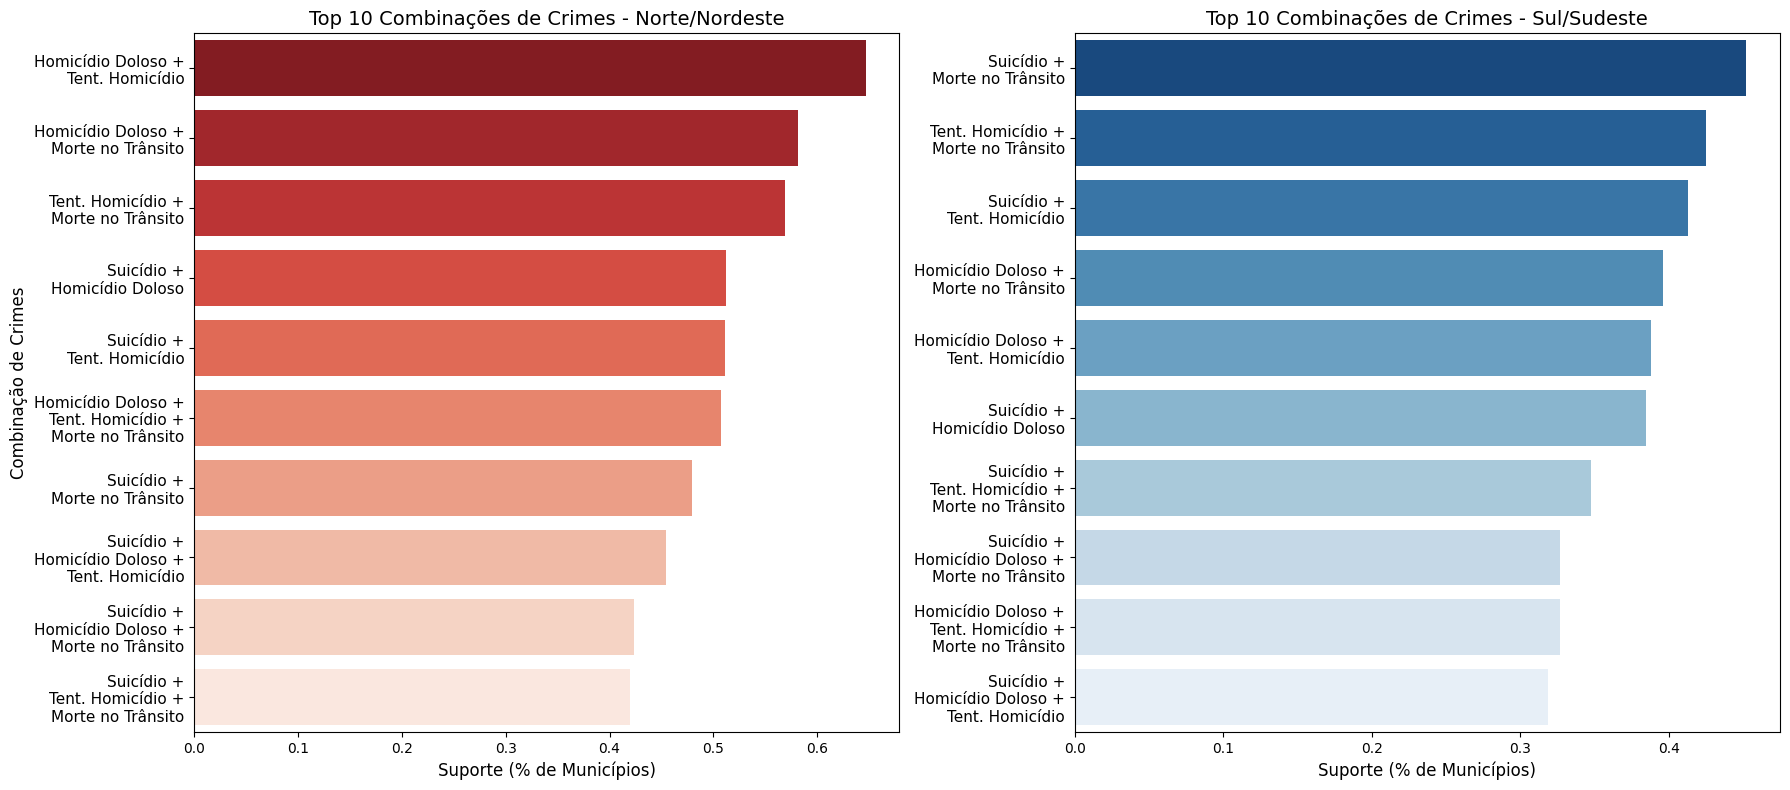

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico Norte/Nordeste
sns.barplot(x='support', y='itemsets_str', data=comb_n_ne, ax=axes[0], palette='Reds_r')
axes[0].set_title('Top 10 Combinações de Crimes - Norte/Nordeste', fontsize=14)
axes[0].set_xlabel('Suporte (% de Municípios)', fontsize=12)
axes[0].set_ylabel('Combinação de Crimes', fontsize=12)
axes[0].tick_params(axis='y', labelsize=11)

# Gráfico Sul/Sudeste
sns.barplot(x='support', y='itemsets_str', data=comb_s_se, ax=axes[1], palette='Blues_r')
axes[1].set_title('Top 10 Combinações de Crimes - Sul/Sudeste', fontsize=14)
axes[1].set_xlabel('Suporte (% de Municípios)', fontsize=12)
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.show()

## Municípios com alto IDH têm perfil criminal diferente daqueles com baixo IDH

In [ ]:
# =============================================================
# CÉLULA 2 — Limpeza da Base de Municípios (mundo_onu_adh_municipio.csv)
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento código UF → sigla
mapa_uf = {
    '11': 'RO', '12': 'AC', '13': 'AM', '14': 'RR', '15': 'PA',
    '16': 'AP', '17': 'TO', '21': 'MA', '22': 'PI', '23': 'CE',
    '24': 'RN', '25': 'PB', '26': 'PE', '27': 'AL', '28': 'SE',
    '29': 'BA', '31': 'MG', '32': 'ES', '33': 'RJ', '35': 'SP',
    '41': 'PR', '42': 'SC', '43': 'RS', '50': 'MS', '51': 'MT',
    '52': 'GO', '53': 'DF'
}

# Carregar CSV e filtrar para 2010 (ano mais recente do Censo)
df_mun_raw = pd.read_csv('./mundo_onu_adh_municipio.csv', sep=None, engine='python')

df_mun = (
    df_mun_raw[df_mun_raw['ano'] == 2010]
    [['id_municipio', 'idhm', 'idhm_e', 'idhm_l', 'idhm_r',
      'renda_pc', 'indice_gini', 'populacao', 'expectativa_vida',
      'taxa_analfabetismo_15_mais']]
    .copy()
    .dropna(subset=['idhm'])
    .reset_index(drop=True)
)

# Extrair UF a partir dos 2 primeiros dígitos do código IBGE
df_mun['uf'] = df_mun['id_municipio'].astype(str).str[:2].map(mapa_uf)

print(f"Municípios após limpeza: {df_mun.shape[0]}")
print(f"UFs presentes: {sorted(df_mun['uf'].unique())}")
print(f"IDHM — média: {df_mun['idhm'].mean():.3f} | mediana: {df_mun['idhm'].median():.3f}")
print(f"Faixa: {df_mun['idhm'].min():.3f} – {df_mun['idhm'].max():.3f}")
df_mun.head()

Municípios após limpeza: 5565
UFs presentes: ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']
IDHM — média: 0.659 | mediana: 0.665
Faixa: 0.418 – 0.862


,id_municipio,idhm,idhm_e,idhm_l,idhm_r,renda_pc,indice_gini,populacao,expectativa_vida,taxa_analfabetismo_15_mais,uf
0,1100015,0.641,0.526,0.763,0.657,476.99,0.58,24392,70.75,11.99,RO
1,1100023,0.702,0.600,0.806,0.716,689.95,0.53,90353,73.36,7.90,RO
2,1100031,0.650,0.559,0.757,0.650,457.17,0.51,6313,70.39,13.63,RO
3,1100049,0.718,0.620,0.821,0.727,738.06,0.57,78574,74.27,8.29,RO
4,1100056,0.692,0.602,0.799,0.688,577.18,0.50,17029,72.94,10.29,RO


In [60]:
# =============================================================
# CÉLULA 3 — Limpeza da Base de Estados (data__1_.xlsx)
# =============================================================

mapa_estado_uf = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM',
    'Bahia': 'BA', 'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES',
    'Goiás': 'GO', 'Maranhão': 'MA', 'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT',
    'Minas Gerais': 'MG', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pará': 'PA',
    'Pernambuco': 'PE', 'Piauí': 'PI', 'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS', 'Rondônia': 'RO',
    'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}

df_estados_raw = pd.read_excel('./EstadosIDH.xlsx')
df_estados = (
    df_estados_raw
    .dropna(subset=['IDHM 2021'])
    .query("Territorialidades != 'Brasil'")
    .loc[lambda d: ~d['Territorialidades'].str.contains('Elaboração|Fontes', na=False)]
    .copy()
)
df_estados.columns = ['estado', 'idhm_2021']
df_estados['idhm_2021'] = pd.to_numeric(df_estados['idhm_2021'], errors='coerce')
df_estados = df_estados.dropna().reset_index(drop=True)
df_estados['uf'] = df_estados['estado'].map(mapa_estado_uf)

print(f"Estados após limpeza: {df_estados.shape[0]}")
df_estados.sort_values('idhm_2021', ascending=False)

Estados após limpeza: 27


,estado,idhm_2021,uf
6,Distrito Federal,0.814,DF
24,São Paulo,0.806,SP
23,Santa Catarina,0.792,SC
12,Minas Gerais,0.774,MG
20,Rio Grande do Sul,0.771,RS
7,Espírito Santo,0.771,ES
14,Paraná,0.769,PR
18,Rio de Janeiro,0.762,RJ
10,Mato Grosso do Sul,0.742,MS
8,Goiás,0.737,GO


In [61]:
# =============================================================
# CÉLULA 4 — Preparação dos crimes
# =============================================================

# Nomes curtos dos crimes (mesmo mapeamento da análise regional)
mapeamento_crimes = {
    'Lesão corporal seguida de morte': 'Lesão Corp. c/ Morte',
    'Morte no trânsito ou em decorrência dele (exceto homicídio doloso)': 'Morte no Trânsito',
    'Roubo seguido de morte (Latrocínio)': 'Latrocínio',
    'Tentativa de feminicídio': 'Tent. Feminicídio',
    'Tentativa de homicídio': 'Tent. Homicídio',
    'Homicídio doloso': 'Homicídio Doloso',
}
df_final_plot = df_final.rename(columns=mapeamento_crimes)
colunas_crimes = [c for c in df_final_plot.columns if c not in ['uf', 'municipio']]

# Agregar por UF para análise estadual
df_crimes_uf = df_final_plot.groupby('uf')[colunas_crimes].sum().reset_index()



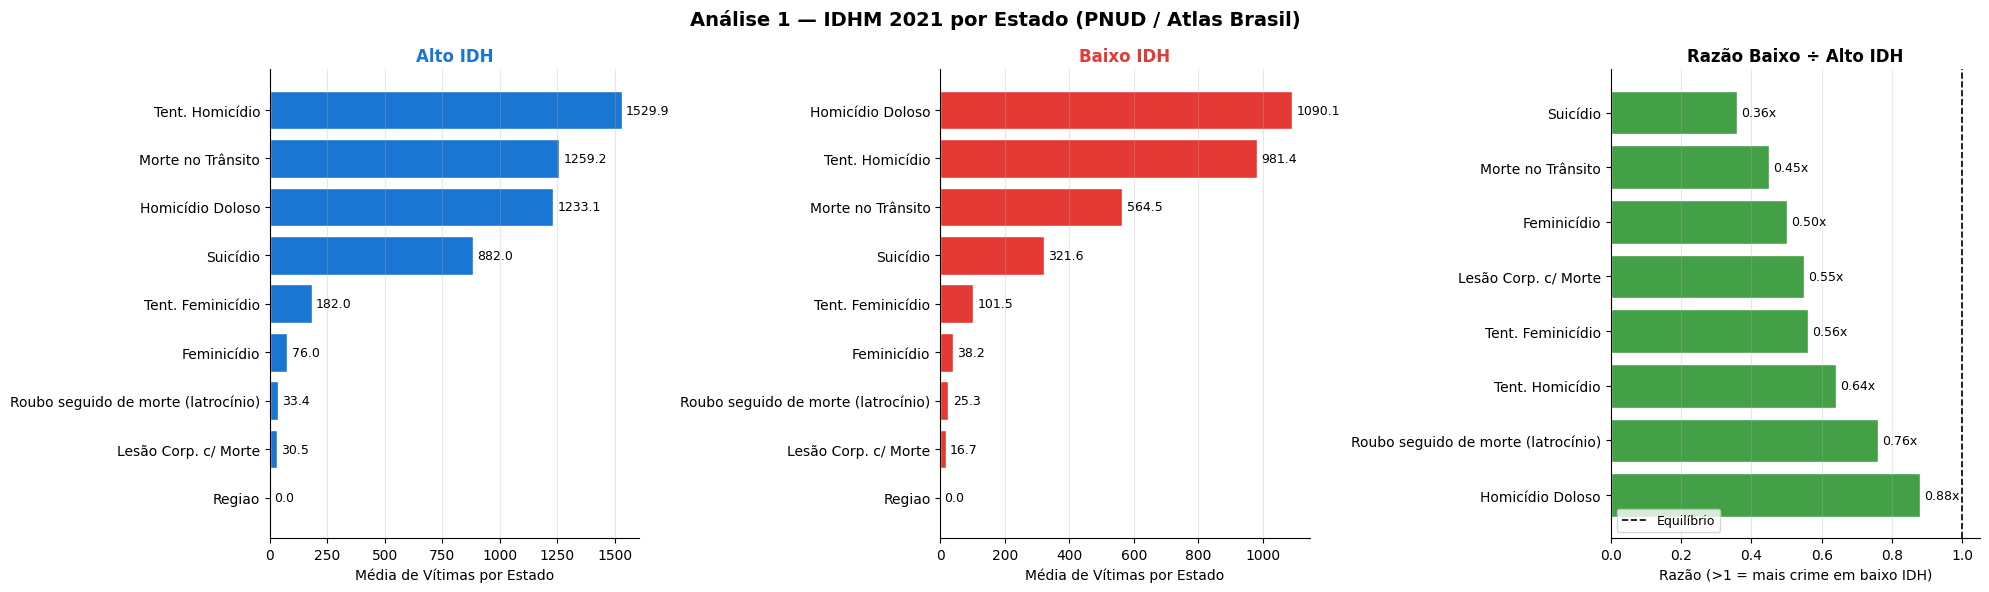

                              Crime    Alto IDH   Baixo IDH  Razão (Baixo/Alto)
                   Homicídio Doloso 1233.142857 1090.076923                0.88
Roubo seguido de morte (latrocínio)   33.357143   25.307692                0.76
                    Tent. Homicídio 1529.928571  981.384615                0.64
                  Tent. Feminicídio  182.000000  101.461538                0.56
               Lesão Corp. c/ Morte   30.500000   16.692308                0.55
                        Feminicídio   76.000000   38.153846                0.50
                  Morte no Trânsito 1259.214286  564.538462                0.45
                           Suicídio  882.000000  321.615385                0.36
                             Regiao    0.000000    0.000000                 NaN


In [63]:
# =============================================================
# CÉLULA 5 — Análise 1: por UF × IDHM 2021 (data__1_.xlsx)
# =============================================================

df_a1 = df_crimes_uf.merge(df_estados[['uf', 'idhm_2021']], on='uf', how='inner')
mediana_1 = df_a1['idhm_2021'].median()
df_a1['grupo'] = df_a1['idhm_2021'].apply(
    lambda x: f'Alto IDH (≥{mediana_1:.3f})' if x >= mediana_1 else f'Baixo IDH (<{mediana_1:.3f})'
)
# 1. Garante que as colunas de crimes sejam numéricas (converte erros em NaN)
for col in colunas_crimes:
    df_a1[col] = pd.to_numeric(df_a1[col].astype(str).str.replace(',', '.'), errors='coerce')

# 2. Preenche possíveis valores vazios com 0 (opcional, mas evita erros no cálculo)
df_a1[colunas_crimes] = df_a1[colunas_crimes].fillna(0)
# Média de vítimas por crime e grupo
df_med1 = df_a1.groupby('grupo')[colunas_crimes].mean().T.reset_index()
df_med1.columns = ['Crime', 'Alto IDH', 'Baixo IDH']
df_med1['Razão (Baixo/Alto)'] = (df_med1['Baixo IDH'] / df_med1['Alto IDH'].replace(0, np.nan)).round(2)
df_med1 = df_med1.sort_values('Razão (Baixo/Alto)', ascending=False)

# ── Gráfico de barras comparativo
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Análise 1 — IDHM 2021 por Estado (PNUD / Atlas Brasil)', fontsize=14, fontweight='bold')

cores = {'Alto IDH': '#1976D2', 'Baixo IDH': '#E53935'}

for ax, grupo in zip(axes[:2], ['Alto IDH', 'Baixo IDH']):
    df_plot = df_med1.sort_values(grupo, ascending=True)
    bars = ax.barh(df_plot['Crime'], df_plot[grupo], color=cores[grupo], edgecolor='white')
    ax.set_title(grupo, fontsize=12, fontweight='bold', color=cores[grupo])
    ax.set_xlabel('Média de Vítimas por Estado')
    ax.bar_label(bars, fmt='%.1f', padding=3, fontsize=9)
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='x', alpha=0.3)

# Razão
ax = axes[2]
cores_razao = ['#E53935' if r > 1 else '#43A047' for r in df_med1['Razão (Baixo/Alto)']]
bars = ax.barh(df_med1['Crime'], df_med1['Razão (Baixo/Alto)'], color=cores_razao, edgecolor='white')
ax.axvline(1, color='black', linestyle='--', linewidth=1.2, label='Equilíbrio')
ax.set_title('Razão Baixo ÷ Alto IDH', fontsize=12, fontweight='bold')
ax.set_xlabel('Razão (>1 = mais crime em baixo IDH)')
ax.bar_label(bars, fmt='%.2fx', padding=3, fontsize=9)
ax.legend(fontsize=9)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()
print(df_med1[['Crime', 'Alto IDH', 'Baixo IDH', 'Razão (Baixo/Alto)']].to_string(index=False))


Municípios cruzados: 5281 de 5289 (99.8%)

Municípios sem correspondência (8):
uf                 municipio
MG       BARÃO DE MONTE ALTO
MS         PARAÍSO DAS ÁGUAS
MT SANTO ANTÔNIO DO LEVERGER
PA          MOJUÍ DOS CAMPOS
RS            PINTO BANDEIRA
SC          BALNEÁRIO RINCÃO
SC            PESCARIA BRAVA
SE            GRACHO CARDOSO

Mediana IDHM municipal: 0.665
grupo
Alto IDH (≥0.665)     2801
Baixo IDH (<0.665)    2761
Name: municípios, dtype: int64


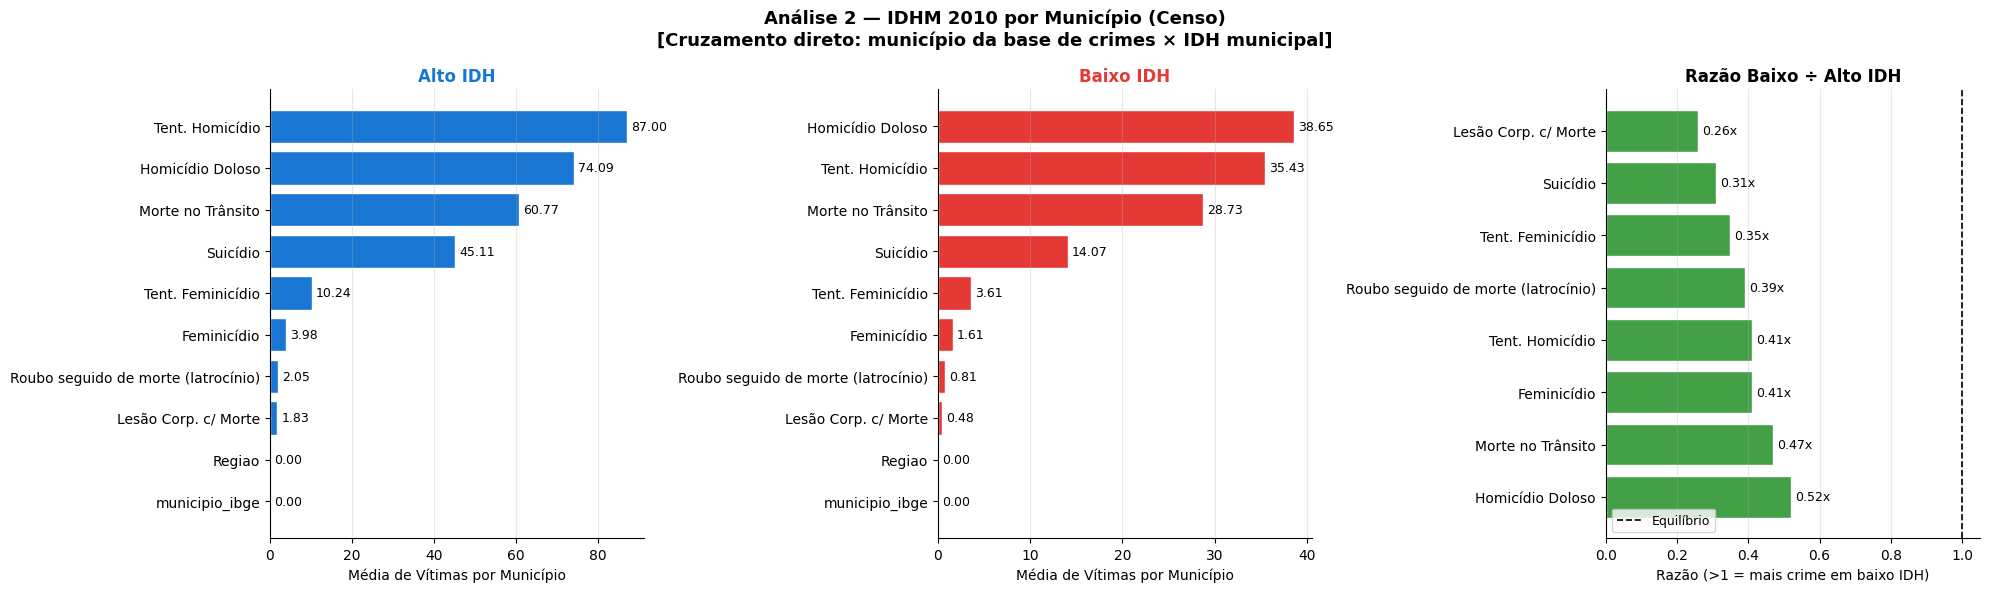


Tabela completa:
                              Crime  Alto IDH  Baixo IDH  Razão (Baixo/Alto)
                   Homicídio Doloso 74.094966  38.645418                0.52
                  Morte no Trânsito 60.774723  28.725100                0.47
                        Feminicídio  3.977151   1.611735                0.41
                    Tent. Homicídio 87.001071  35.432814                0.41
Roubo seguido de morte (latrocínio)  2.045698   0.807678                0.39
                  Tent. Feminicídio 10.235630   3.614632                0.35
                           Suicídio 45.112460  14.070989                0.31
               Lesão Corp. c/ Morte  1.827919   0.478088                0.26
                             Regiao  0.000000   0.000000                 NaN
                     municipio_ibge  0.000000   0.000000                 NaN


In [ ]:
# =============================================================
# CÉLULA 6 — Análise com IDHM 2010 (base de municípios)
#             com cruzamento direto por município via tabela IBGE
# =============================================================

import unicodedata

# --- Passo 1: Carregar tabela de nomes do IBGE ---
df_inicio = pd.read_excel('./municipios_ibge.xls', skiprows=6)
df_nomes = df_inicio[['Nome_Município', 'Nome_UF', 'Código Município Completo']].copy()
df_nomes.columns = ['municipio_ibge', 'nome_uf', 'id_municipio']
df_nomes['id_municipio'] = pd.to_numeric(df_nomes['id_municipio'], errors='coerce')
df_nomes = df_nomes.dropna(subset=['id_municipio']).reset_index(drop=True)
df_nomes['id_municipio'] = df_nomes['id_municipio'].astype(int)

# Mapear nome do estado → sigla UF
mapa_uf = {
    'Rondônia': 'RO', 'Acre': 'AC', 'Amazonas': 'AM', 'Roraima': 'RR',
    'Pará': 'PA', 'Amapá': 'AP', 'Tocantins': 'TO', 'Maranhão': 'MA',
    'Piauí': 'PI', 'Ceará': 'CE', 'Rio Grande do Norte': 'RN',
    'Paraíba': 'PB', 'Pernambuco': 'PE', 'Alagoas': 'AL', 'Sergipe': 'SE',
    'Bahia': 'BA', 'Minas Gerais': 'MG', 'Espírito Santo': 'ES',
    'Rio de Janeiro': 'RJ', 'São Paulo': 'SP', 'Paraná': 'PR',
    'Santa Catarina': 'SC', 'Rio Grande do Sul': 'RS',
    'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT', 'Goiás': 'GO',
    'Distrito Federal': 'DF'
}
df_nomes['uf'] = df_nomes['nome_uf'].map(mapa_uf)

# --- Passo 2: Função de normalização para o merge ---
def normalizar(texto):
    if pd.isna(texto):
        return ''
    texto = str(texto).upper().strip()
    texto = unicodedata.normalize('NFD', texto)
    texto = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
    return texto

df_nomes['municipio_norm'] = df_nomes['municipio_ibge'].apply(normalizar)
df_nomes['uf_norm'] = df_nomes['uf'].str.strip().str.upper()

# --- Passo 3: Juntar tabela IBGE com o CSV de IDH municipal ---
# df_mun vem da Célula 2: tem 'id_municipio' e 'uf'
df_mun_nome = df_mun.merge(
    df_nomes[['id_municipio', 'municipio_ibge', 'municipio_norm', 'uf_norm']],
    on='id_municipio',
    how='left'
)

# --- Passo 4: Normalizar municípios na base de crimes ---
df_final_plot['municipio_norm'] = df_final_plot['municipio'].apply(normalizar)
df_final_plot['uf_norm'] = df_final_plot['uf'].str.strip().str.upper()

# --- Passo 5: Cruzar crimes × IDH diretamente por município ---
df_a2_mun = df_final_plot.merge(
    df_mun_nome[['municipio_norm', 'uf_norm', 'idhm', 'municipio_ibge']],
    on=['municipio_norm', 'uf_norm'],
    how='inner'
)

casados = df_a2_mun['municipio_norm'].nunique()
total   = df_final_plot['municipio_norm'].nunique()
print(f"\nMunicípios cruzados: {casados} de {total} ({casados/total*100:.1f}%)")

nao_casados = df_final_plot[
    ~df_final_plot['municipio_norm'].isin(df_a2_mun['municipio_norm'])
][['uf', 'municipio']].drop_duplicates()

# --- Passo 6: Classificar por IDH e calcular médias ---
mediana_mun = df_a2_mun['idhm'].median()
df_a2_mun['grupo'] = df_a2_mun['idhm'].apply(
    lambda x: f'Alto IDH (≥{mediana_mun:.3f})' if x >= mediana_mun 
              else f'Baixo IDH (<{mediana_mun:.3f})'
)

print(f"\nMediana IDHM municipal: {mediana_mun:.3f}")
print(df_a2_mun.groupby('grupo').size().rename('municípios'))

# Identifica as colunas de crimes
colunas_crimes = [c for c in df_a2_mun.columns 
                  if c not in ['uf', 'municipio', 'municipio_norm', 'uf_norm', 'idhm', 'grupo', 'id_municipio']]

# --- CORREÇÃO: Converte as colunas de crimes para numérico ---
for col in colunas_crimes:
    # Remove pontos de milhar, troca vírgula por ponto e converte
    df_a2_mun[col] = pd.to_numeric(
        df_a2_mun[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False), 
        errors='coerce'
    ).fillna(0)
# -----------------------------------------------------------

# Agora o .mean() não dará mais erro
df_med2 = df_a2_mun.groupby('grupo')[colunas_crimes].mean().T.reset_index()
df_med2.columns = ['Crime', 'Alto IDH', 'Baixo IDH']
df_med2['Razão (Baixo/Alto)'] = (
    df_med2['Baixo IDH'] / df_med2['Alto IDH'].replace(0, np.nan)
).round(2)
df_med2 = df_med2.sort_values('Razão (Baixo/Alto)', ascending=False)

# --- Passo 7: Visualização ---
cores = {'Alto IDH': '#1976D2', 'Baixo IDH': '#E53935'}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle(
    'Análise 2 — IDHM 2010 por Município (Censo)\n'
    '[Cruzamento direto: município da base de crimes × IDH municipal]',
    fontsize=13, fontweight='bold'
)

for ax, grupo in zip(axes[:2], ['Alto IDH', 'Baixo IDH']):
    df_plot = df_med2.sort_values(grupo, ascending=True)
    bars = ax.barh(df_plot['Crime'], df_plot[grupo], color=cores[grupo], edgecolor='white')
    ax.set_title(grupo, fontsize=12, fontweight='bold', color=cores[grupo])
    ax.set_xlabel('Média de Vítimas por Município')
    ax.bar_label(bars, fmt='%.2f', padding=3, fontsize=9)
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='x', alpha=0.3)

ax = axes[2]
cores_razao = ['#E53935' if r > 1 else '#43A047' for r in df_med2['Razão (Baixo/Alto)']]
bars = ax.barh(df_med2['Crime'], df_med2['Razão (Baixo/Alto)'],
               color=cores_razao, edgecolor='white')
ax.axvline(1, color='black', linestyle='--', linewidth=1.2, label='Equilíbrio')
ax.set_title('Razão Baixo ÷ Alto IDH', fontsize=12, fontweight='bold')
ax.set_xlabel('Razão (>1 = mais crime em baixo IDH)')
ax.bar_label(bars, fmt='%.2fx', padding=3, fontsize=9)
ax.legend(fontsize=9)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTabela completa:")
print(df_med2[['Crime', 'Alto IDH', 'Baixo IDH', 'Razão (Baixo/Alto)']].to_string(index=False))

C:\Users\Rafael\AppData\Local\Temp\ipykernel_44040\1082993690.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mun_plot, x='idhm', y='uf', order=ordem_uf,


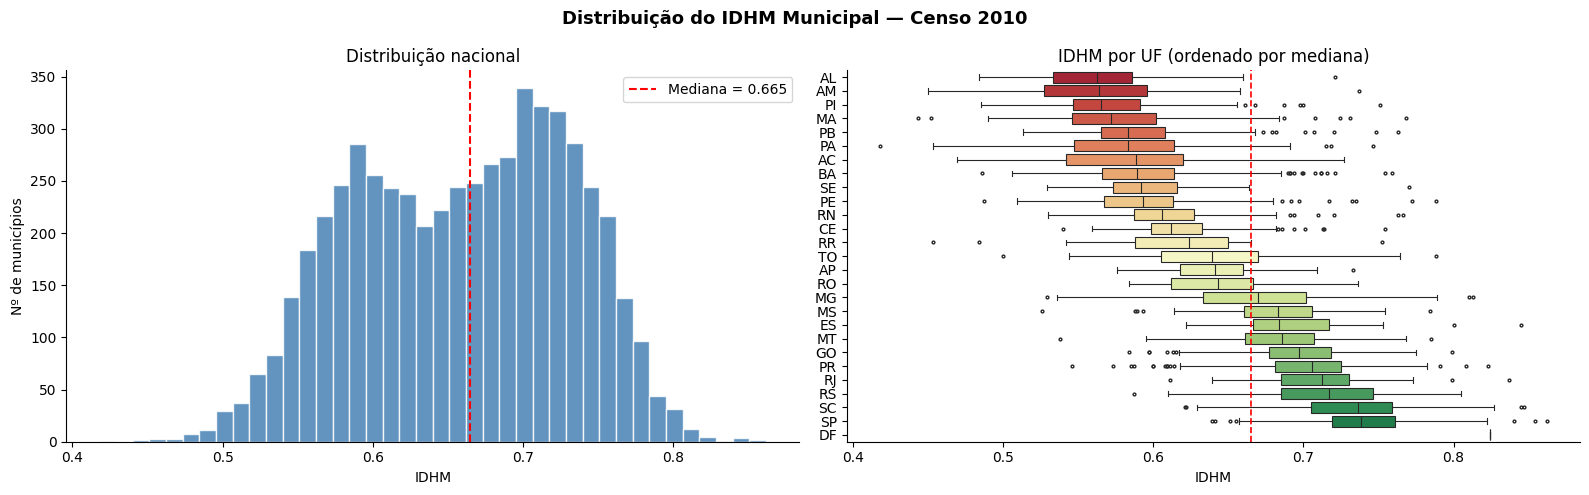

In [66]:
# =============================================================
# CÉLULA 7 — Distribuição do IDHM municipal (histograma)
# =============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Distribuição do IDHM Municipal — Censo 2010', fontsize=13, fontweight='bold')

# Histograma geral
ax = axes[0]
ax.hist(df_mun['idhm'], bins=40, color='steelblue', edgecolor='white', alpha=0.85)
ax.axvline(mediana_2, color='red', linestyle='--', linewidth=1.5, label=f'Mediana = {mediana_2:.3f}')
ax.set_title('Distribuição nacional')
ax.set_xlabel('IDHM')
ax.set_ylabel('Nº de municípios')
ax.legend()
ax.spines[['top', 'right']].set_visible(False)

# Boxplot por UF (ordenado por mediana)
ax = axes[1]
ordem_uf = df_mun.groupby('uf')['idhm'].median().sort_values().index
df_mun_plot = df_mun[df_mun['uf'].isin(ordem_uf)]
sns.boxplot(data=df_mun_plot, x='idhm', y='uf', order=ordem_uf,
            palette='RdYlGn', ax=ax, linewidth=0.8, fliersize=2)
ax.axvline(mediana_2, color='red', linestyle='--', linewidth=1.2)
ax.set_title('IDHM por UF (ordenado por mediana)')
ax.set_xlabel('IDHM')
ax.set_ylabel('')
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()